# Hyperparameter Tuning


In [1]:
import os
import pandas as pd

train_data_file = os.path.join('..', '..', '..', '..', 'data', 'raw', 'train.csv')
train_data = pd.read_csv(train_data_file, index_col=0, low_memory=False)

validation_data_file = os.path.join('..', '..', '..', '..', 'data', 'interim', 'all_test_4_55h.csv')
validation_data = pd.read_csv(validation_data_file, index_col=0, low_memory=False)

additional_train_data_file = os.path.join('..', '..', '..', '..', 'data', 'interim', 'all_test_3h.csv')
additional_train_data = pd.read_csv(additional_train_data_file, index_col=0, low_memory=False)
# remove from additional data patients that are not in validation data ids
additional_train_data = additional_train_data[~additional_train_data.index.isin(validation_data.index.unique())]

# merge train and additional data
train_data = pd.concat([train_data, additional_train_data], axis=0)

# do not train with patients that are not have to be predicted
test_data_file = os.path.join('..', '..', '..', '..', 'data', 'raw', 'test.csv')
test_data = pd.read_csv(test_data_file, index_col=0, low_memory=False)

unique_patients = test_data['p_num'].unique()
train_data = train_data[train_data['p_num'].isin(unique_patients)]
validation_data = validation_data[validation_data['p_num'].isin(unique_patients)]
test_data = test_data[test_data['p_num'].isin(unique_patients)]

train_data.head()

,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,...,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00
id,,,,,,,,,,,,,,,,,,,,,
p01_0,p01,06:10:00,NaN,NaN,9.6,NaN,NaN,9.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4
p01_1,p01,06:25:00,NaN,NaN,9.7,NaN,NaN,9.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8
p01_2,p01,06:40:00,NaN,NaN,9.2,NaN,NaN,8.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5
p01_3,p01,06:55:00,NaN,NaN,8.7,NaN,NaN,8.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8
p01_4,p01,07:10:00,NaN,NaN,8.4,NaN,NaN,8.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7


### Define a tuning function

In [2]:
import joblib

def tune(p_num, tuner, X_train, y_train, X_test, y_test):
    model_file_name = f'{p_num}.{tuner.__name__}.model.pkl'
    if os.path.exists(model_file_name):
        print(f'Model {model_file_name} already exists. Skipping...')
        return

    print(f'-----------{tuner.__name__}-----------')
    print('Calculating best hyperparameters...')
    tuner.fit(X_train, y_train, X_test, y_test)
    print('Best hyperparameters found.')
    display(tuner.get_params())
    print(f'RMSE: {tuner.get_rmse()}')
    tuner.show_chart()
    joblib.dump(tuner.get_best_model(), model_file_name)

Model p01.XGBRegressor.model.pkl already exists. Skipping...
Model p01.HistGradientBoostingRegressor.model.pkl already exists. Skipping...
Model p01.LassoLarsIC.model.pkl already exists. Skipping...
Model p02.XGBRegressor.model.pkl already exists. Skipping...
Model p02.HistGradientBoostingRegressor.model.pkl already exists. Skipping...
Model p02.LassoLarsIC.model.pkl already exists. Skipping...
Model p04.XGBRegressor.model.pkl already exists. Skipping...
Model p04.HistGradientBoostingRegressor.model.pkl already exists. Skipping...
Model p04.LassoLarsIC.model.pkl already exists. Skipping...
Model p05.XGBRegressor.model.pkl already exists. Skipping...
Model p05.HistGradientBoostingRegressor.model.pkl already exists. Skipping...
Model p05.LassoLarsIC.model.pkl already exists. Skipping...
Model p06.XGBRegressor.model.pkl already exists. Skipping...
Model p06.HistGradientBoostingRegressor.model.pkl already exists. Skipping...
Model p06.LassoLarsIC.model.pkl already exists. Skipping...
-----

OrderedDict([('alpha', 0.011866105296908167),
             ('colsample_bytree', 0.9575588163219402),
             ('gamma', 2),
             ('lambda', 1.1821653055248614e-08),
             ('learning_rate', 0.09614873375647565),
             ('max_depth', 7),
             ('min_child_weight', 5),
             ('n_estimators', 558),
             ('scale_pos_weight', 79),
             ('subsample', 0.7787136018188425)])

RMSE: 0.5874827234931337


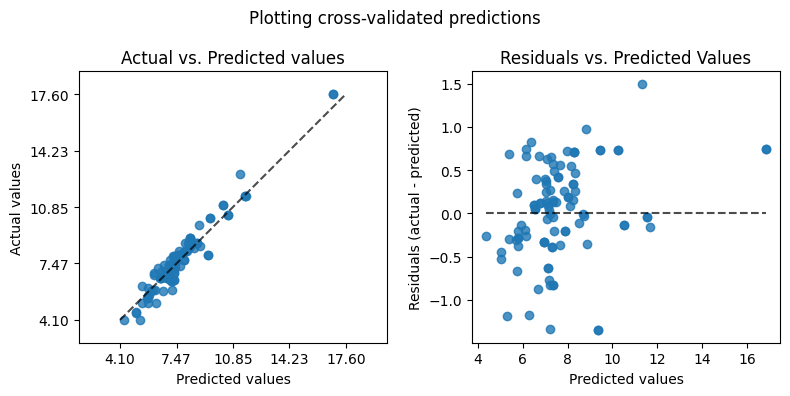

-----------HistGradientBoostingRegressor-----------
Calculating best hyperparameters...


/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Best hyperparameters found.


OrderedDict([('early_stopping', False),
             ('l2_regularization', 1.0),
             ('learning_rate', 0.1450131799391771),
             ('max_bins', 255),
             ('max_depth', 15),
             ('max_iter', 500),
             ('max_leaf_nodes', 31),
             ('min_samples_leaf', 10),
             ('scoring', 'neg_mean_squared_error')])

RMSE: 0.5157585042611694


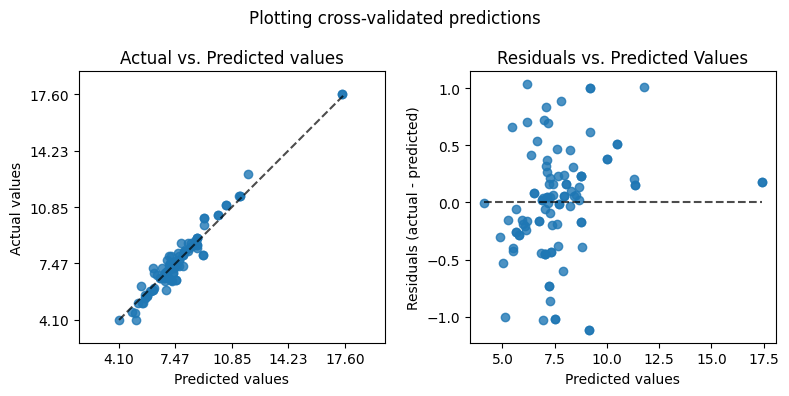

-----------LassoLarsIC-----------
Calculating best hyperparameters...


/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Best hyperparameters found.


OrderedDict([('criterion', 'bic'),
             ('eps', 0.09200172255146727),
             ('max_iter', 2986),
             ('noise_variance', 0.008376726714168206),
             ('positive', False)])

RMSE: 1.8861534343398467


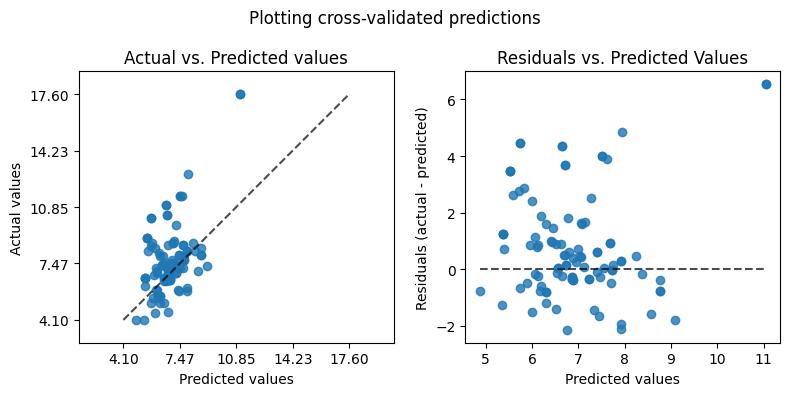

-----------XGBRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('alpha', 6.855704845841059e-06),
             ('colsample_bytree', 0.8187167539344609),
             ('gamma', 4),
             ('lambda', 1.1621254063240904),
             ('learning_rate', 0.019745056150532028),
             ('max_depth', 15),
             ('min_child_weight', 9),
             ('n_estimators', 488),
             ('scale_pos_weight', 18),
             ('subsample', 0.8142034266505016)])

RMSE: 0.627721548590985


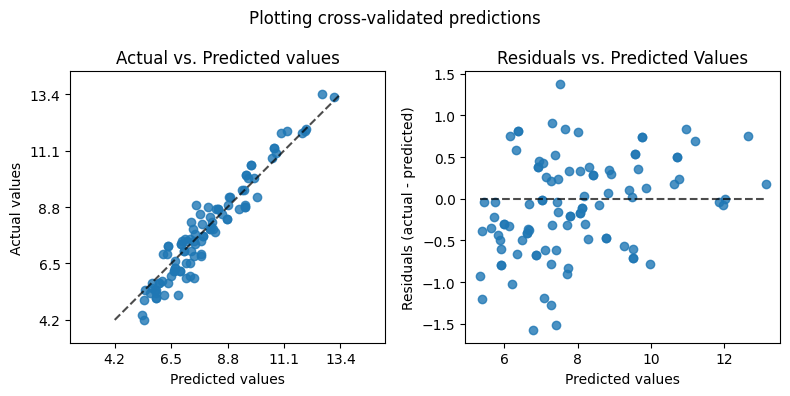

-----------HistGradientBoostingRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('early_stopping', False),
             ('l2_regularization', 1.0),
             ('learning_rate', 0.2),
             ('max_bins', 255),
             ('max_depth', 13),
             ('max_iter', 500),
             ('max_leaf_nodes', 31),
             ('min_samples_leaf', 10),
             ('scoring', 'neg_mean_squared_error')])

RMSE: 0.6515813115055344


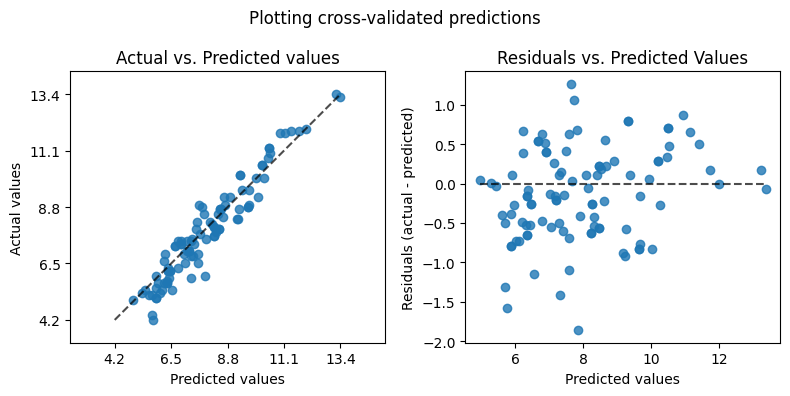

-----------LassoLarsIC-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('criterion', 'aic'),
             ('eps', 0.09187306494172101),
             ('max_iter', 1419),
             ('noise_variance', 0.004333894685900382),
             ('positive', False)])

RMSE: 1.7609875795579466


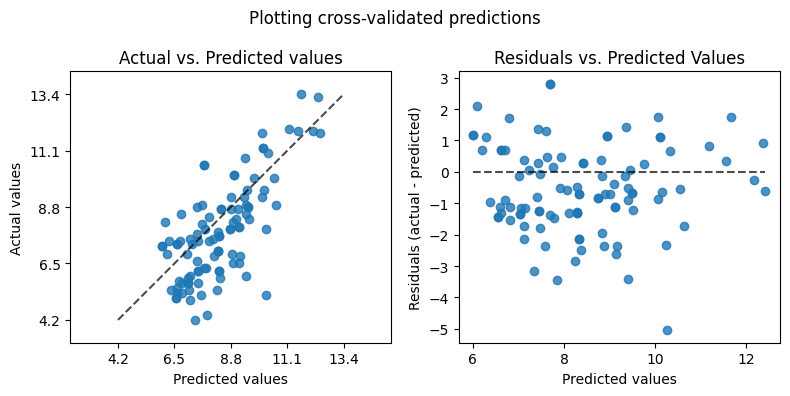

-----------XGBRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('alpha', 1e-10),
             ('colsample_bytree', 1.0),
             ('gamma', 0),
             ('lambda', 1e-10),
             ('learning_rate', 0.029640991597493015),
             ('max_depth', 12),
             ('min_child_weight', 1),
             ('n_estimators', 507),
             ('scale_pos_weight', 100),
             ('subsample', 0.5)])

RMSE: 0.2444553017404829


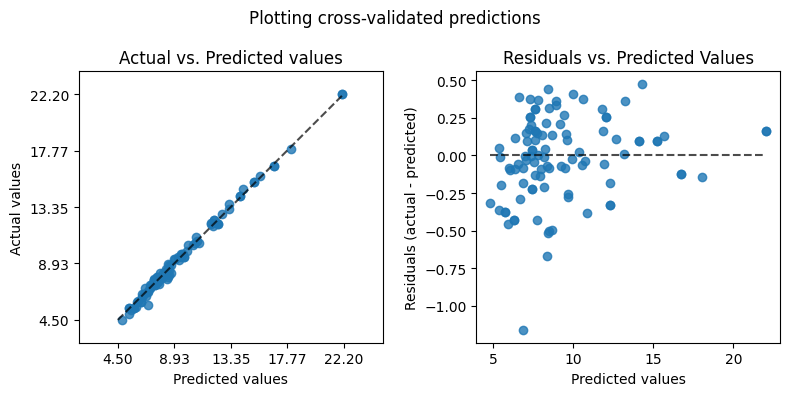

-----------HistGradientBoostingRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('early_stopping', False),
             ('l2_regularization', 0.00402059100390033),
             ('learning_rate', 0.2),
             ('max_bins', 236),
             ('max_depth', 15),
             ('max_iter', 393),
             ('max_leaf_nodes', 31),
             ('min_samples_leaf', 34),
             ('scoring', 'neg_mean_squared_error')])

RMSE: 0.6895499383741437


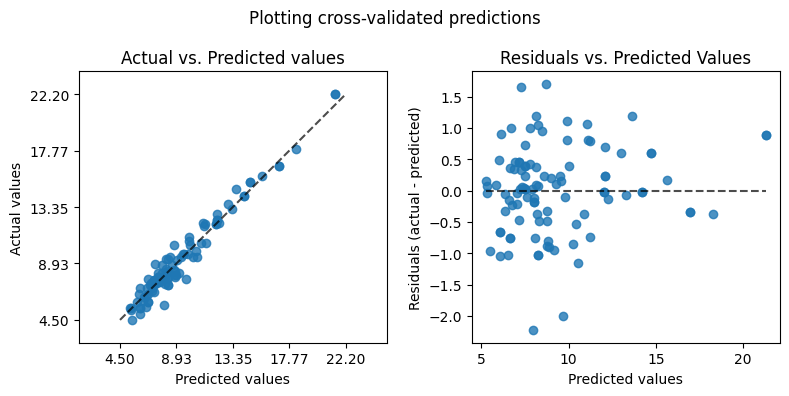

-----------LassoLarsIC-----------
Calculating best hyperparameters...


/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been 

Best hyperparameters found.


OrderedDict([('criterion', 'bic'),
             ('eps', 0.09200172255146727),
             ('max_iter', 2986),
             ('noise_variance', 0.008376726714168206),
             ('positive', False)])

RMSE: 1.758210309947812


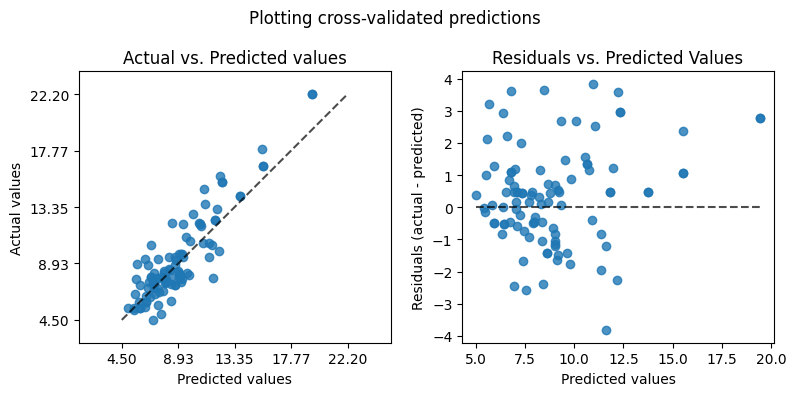

-----------XGBRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('alpha', 9.536761516259974e-07),
             ('colsample_bytree', 0.64564069222272),
             ('gamma', 0),
             ('lambda', 10.0),
             ('learning_rate', 0.02239604689438204),
             ('max_depth', 15),
             ('min_child_weight', 1),
             ('n_estimators', 929),
             ('scale_pos_weight', 69),
             ('subsample', 0.5)])

RMSE: 0.18820458790485953


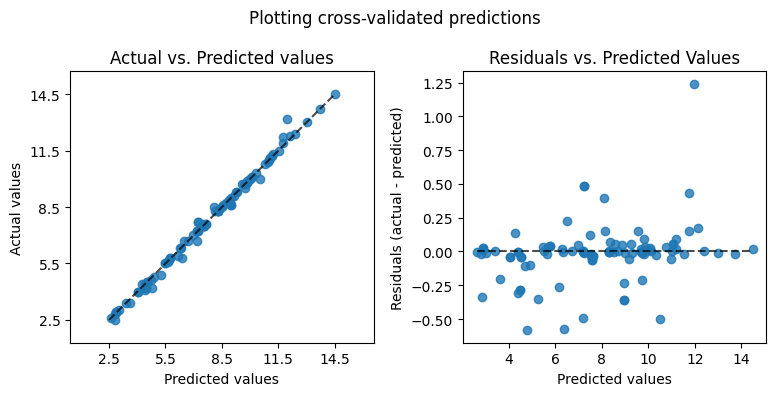

-----------HistGradientBoostingRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('early_stopping', False),
             ('l2_regularization', 1.0),
             ('learning_rate', 0.2),
             ('max_bins', 128),
             ('max_depth', 15),
             ('max_iter', 500),
             ('max_leaf_nodes', 15),
             ('min_samples_leaf', 43),
             ('scoring', 'neg_mean_squared_error')])

RMSE: 0.5650149505764608


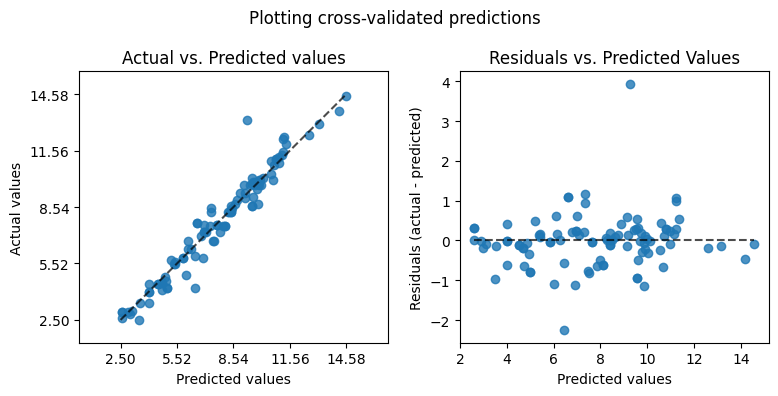

-----------LassoLarsIC-----------
Calculating best hyperparameters...


/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Best hyperparameters found.


OrderedDict([('criterion', 'aic'),
             ('eps', 0.09187306494172101),
             ('max_iter', 1419),
             ('noise_variance', 0.004333894685900382),
             ('positive', False)])

RMSE: 2.411296083943681


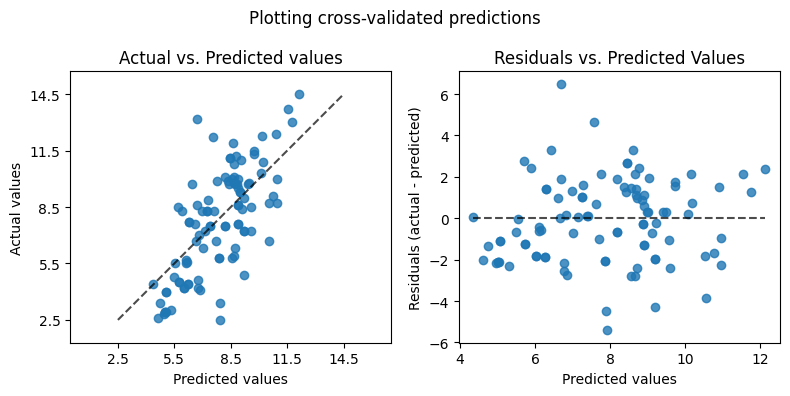

-----------XGBRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('alpha', 1e-10),
             ('colsample_bytree', 0.3),
             ('gamma', 0),
             ('lambda', 1e-10),
             ('learning_rate', 0.0496164549286067),
             ('max_depth', 9),
             ('min_child_weight', 1),
             ('n_estimators', 135),
             ('scale_pos_weight', 100),
             ('subsample', 0.8013298640384006)])

RMSE: 0.3454169559431573


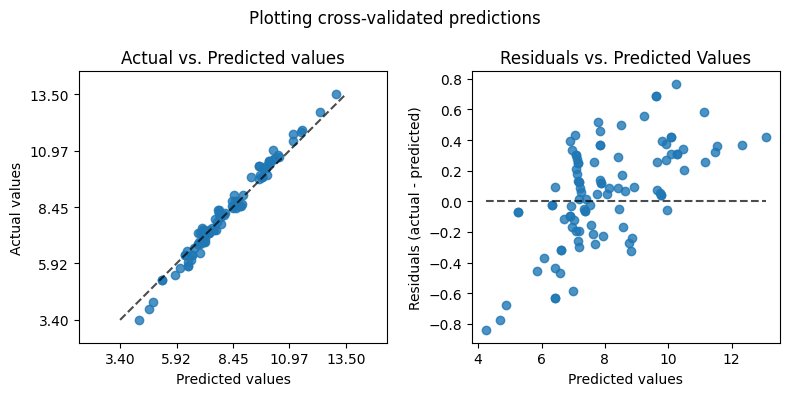

-----------HistGradientBoostingRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('early_stopping', False),
             ('l2_regularization', 0.03208671084292142),
             ('learning_rate', 0.2),
             ('max_bins', 128),
             ('max_depth', 10),
             ('max_iter', 307),
             ('max_leaf_nodes', 21),
             ('min_samples_leaf', 15),
             ('scoring', 'neg_mean_squared_error')])

RMSE: 0.21601444030659717


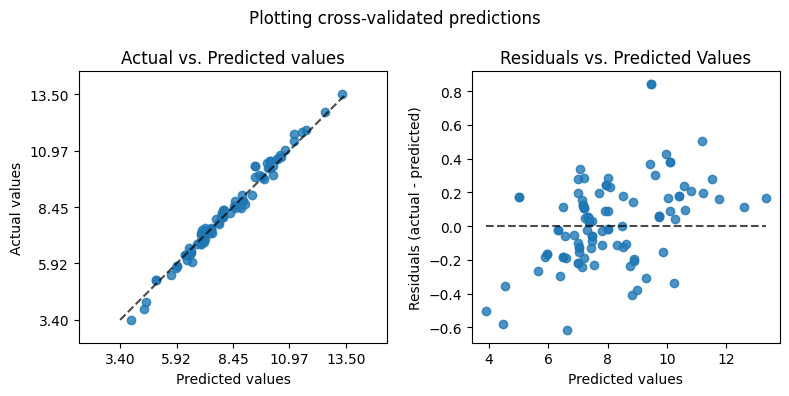

-----------LassoLarsIC-----------
Calculating best hyperparameters...


/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been 

Best hyperparameters found.


OrderedDict([('criterion', 'aic'),
             ('eps', 0.09187306494172101),
             ('max_iter', 1419),
             ('noise_variance', 0.004333894685900382),
             ('positive', False)])

RMSE: 1.2264146825670486


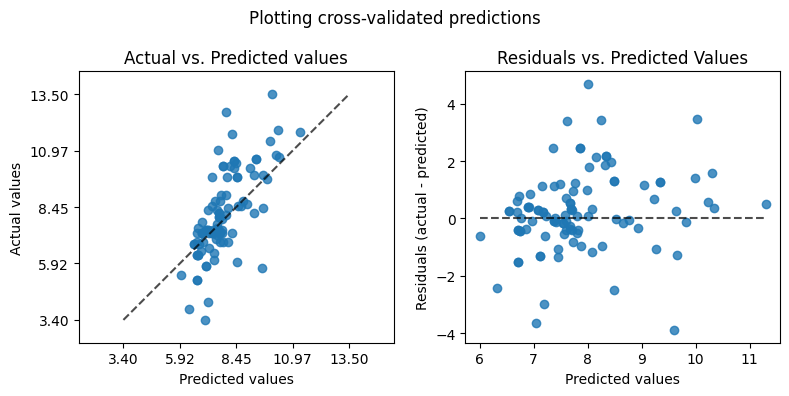

-----------XGBRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('alpha', 0.7795837597962987),
             ('colsample_bytree', 1.0),
             ('gamma', 2),
             ('lambda', 1.218559800304999e-07),
             ('learning_rate', 0.08085233320491544),
             ('max_depth', 6),
             ('min_child_weight', 5),
             ('n_estimators', 633),
             ('scale_pos_weight', 73),
             ('subsample', 0.9608385672810908)])

RMSE: 0.9201821015288005


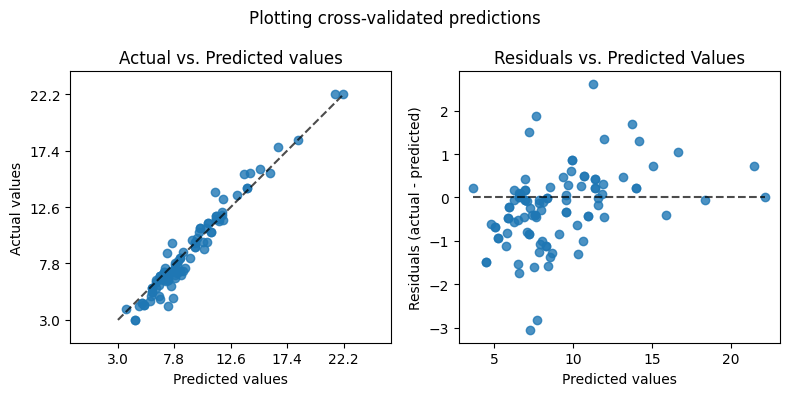

-----------HistGradientBoostingRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('early_stopping', False),
             ('l2_regularization', 1.0),
             ('learning_rate', 0.10762989065072937),
             ('max_bins', 255),
             ('max_depth', 14),
             ('max_iter', 444),
             ('max_leaf_nodes', 31),
             ('min_samples_leaf', 10),
             ('scoring', 'neg_mean_squared_error')])

RMSE: 0.3344641330896201


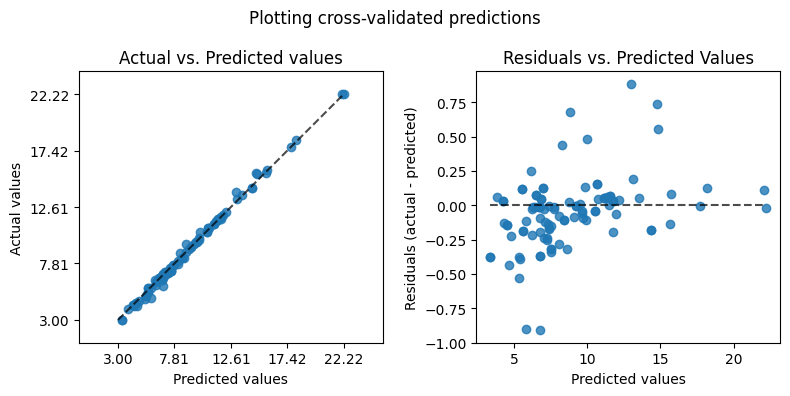

-----------LassoLarsIC-----------
Calculating best hyperparameters...


/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Best hyperparameters found.


OrderedDict([('criterion', 'aic'),
             ('eps', 0.09187306494172101),
             ('max_iter', 1419),
             ('noise_variance', 0.004333894685900382),
             ('positive', False)])

RMSE: 2.647460428860913


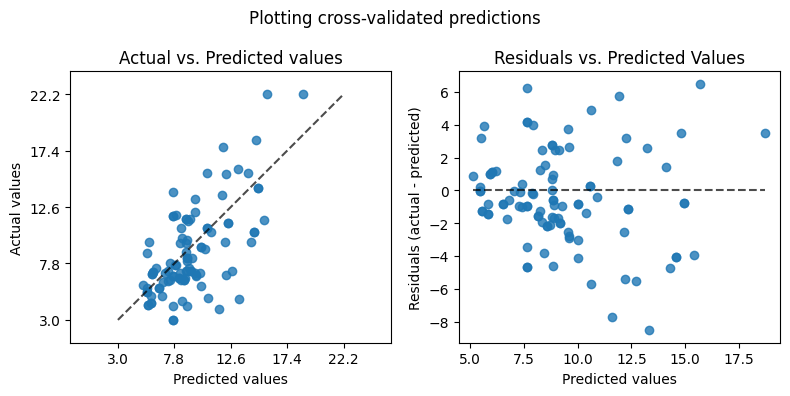

-----------XGBRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('alpha', 2.4248693839730833),
             ('colsample_bytree', 0.3004684388763542),
             ('gamma', 0),
             ('lambda', 0.00021345494230343344),
             ('learning_rate', 0.02711523722945851),
             ('max_depth', 9),
             ('min_child_weight', 2),
             ('n_estimators', 763),
             ('scale_pos_weight', 1),
             ('subsample', 1.0)])

RMSE: 0.15330597794349674


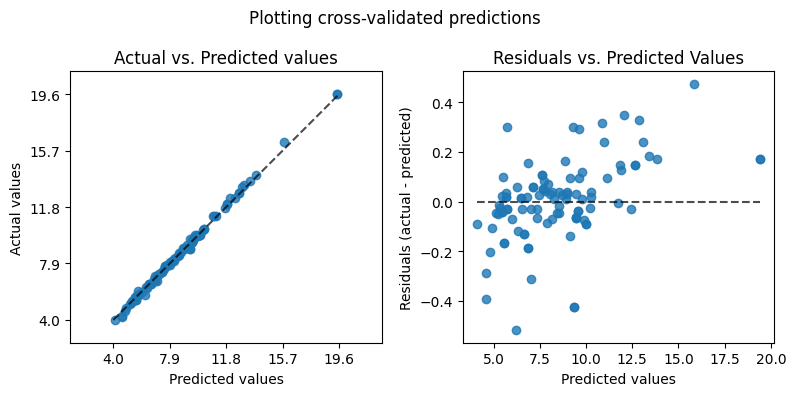

-----------HistGradientBoostingRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('early_stopping', False),
             ('l2_regularization', 0.004198849482529774),
             ('learning_rate', 0.11602536684577903),
             ('max_bins', 153),
             ('max_depth', 10),
             ('max_iter', 303),
             ('max_leaf_nodes', 17),
             ('min_samples_leaf', 10),
             ('scoring', 'neg_mean_squared_error')])

RMSE: 0.5484328625467235


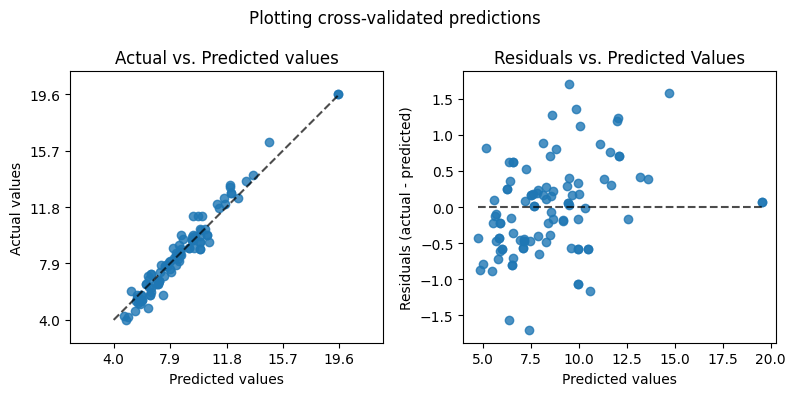

-----------LassoLarsIC-----------
Calculating best hyperparameters...


/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Best hyperparameters found.


OrderedDict([('criterion', 'bic'),
             ('eps', 0.09200172255146727),
             ('max_iter', 2986),
             ('noise_variance', 0.008376726714168206),
             ('positive', False)])

RMSE: 1.666837101347414


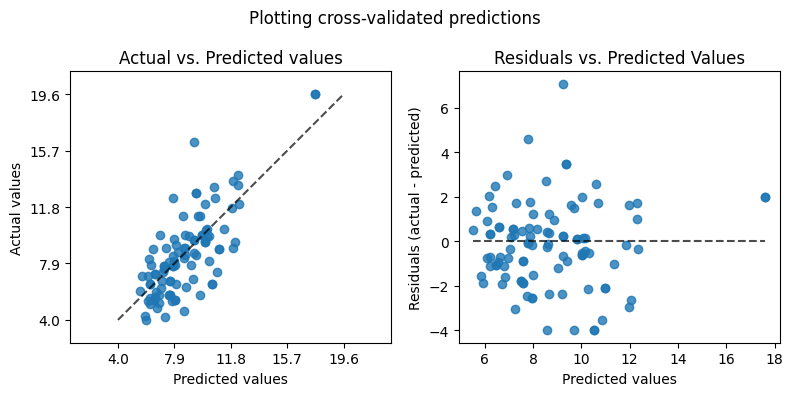

-----------XGBRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('alpha', 0.013811410865305688),
             ('colsample_bytree', 1.0),
             ('gamma', 0),
             ('lambda', 10.0),
             ('learning_rate', 0.1928449192785423),
             ('max_depth', 13),
             ('min_child_weight', 9),
             ('n_estimators', 480),
             ('scale_pos_weight', 79),
             ('subsample', 0.9903078885801615)])

RMSE: 0.005186560912692612


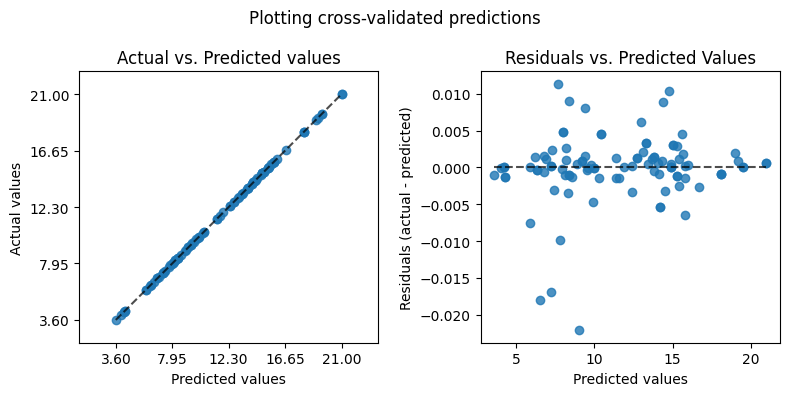

-----------HistGradientBoostingRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('early_stopping', False),
             ('l2_regularization', 1.0),
             ('learning_rate', 0.15797785146272136),
             ('max_bins', 128),
             ('max_depth', 15),
             ('max_iter', 500),
             ('max_leaf_nodes', 31),
             ('min_samples_leaf', 10),
             ('scoring', 'neg_mean_squared_error')])

RMSE: 0.13244457711181565


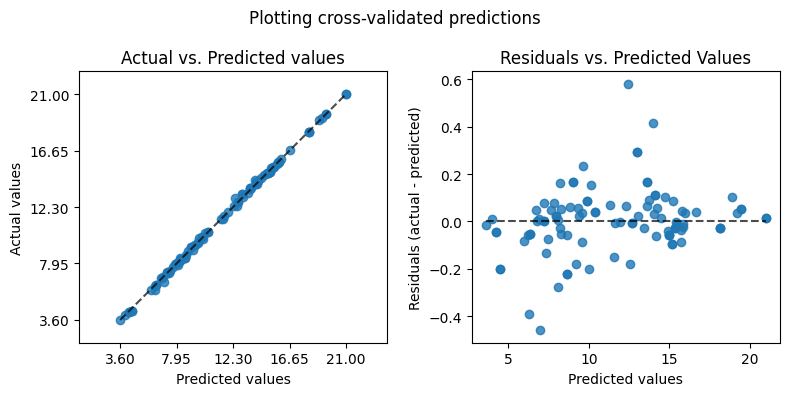

-----------LassoLarsIC-----------
Calculating best hyperparameters...


/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been 

Best hyperparameters found.


OrderedDict([('criterion', 'bic'),
             ('eps', 1.0000000000000155e-05),
             ('max_iter', 5000),
             ('noise_variance', 0.01),
             ('positive', False)])

RMSE: 2.5158707758893244


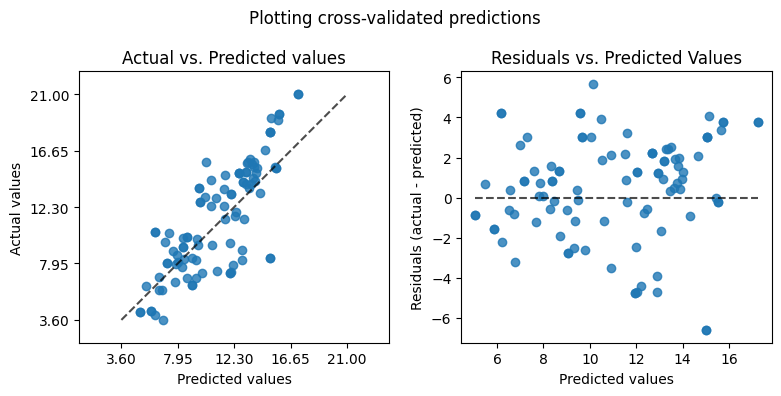

-----------XGBRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('alpha', 0.29315057240901343),
             ('colsample_bytree', 1.0),
             ('gamma', 0),
             ('lambda', 1.050299720696585e-10),
             ('learning_rate', 0.03289547944381584),
             ('max_depth', 11),
             ('min_child_weight', 6),
             ('n_estimators', 643),
             ('scale_pos_weight', 100),
             ('subsample', 0.90038305425086)])

RMSE: 0.04301952775328579


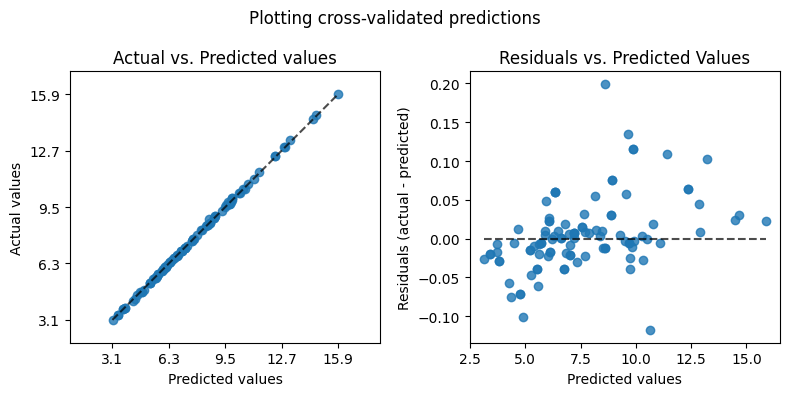

-----------HistGradientBoostingRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('early_stopping', False),
             ('l2_regularization', 0.043513970791520494),
             ('learning_rate', 0.16356457461011642),
             ('max_bins', 168),
             ('max_depth', 11),
             ('max_iter', 266),
             ('max_leaf_nodes', 21),
             ('min_samples_leaf', 40),
             ('scoring', 'neg_mean_squared_error')])

RMSE: 0.4500937319519742


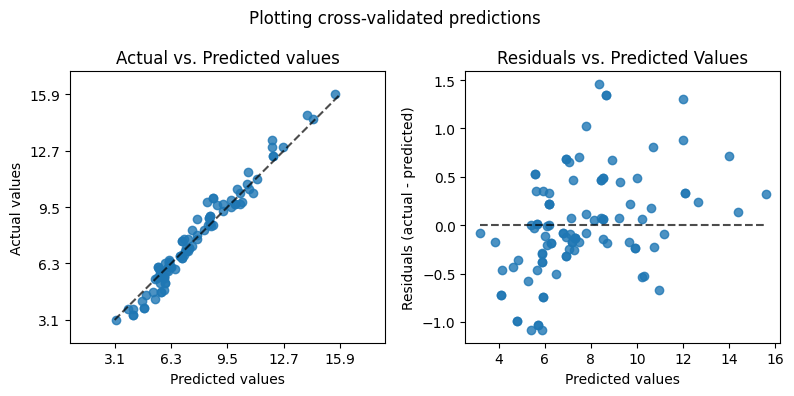

-----------LassoLarsIC-----------
Calculating best hyperparameters...


/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been 

Best hyperparameters found.


OrderedDict([('criterion', 'bic'),
             ('eps', 0.09200172255146727),
             ('max_iter', 2986),
             ('noise_variance', 0.008376726714168206),
             ('positive', False)])

RMSE: 1.9896615649321694


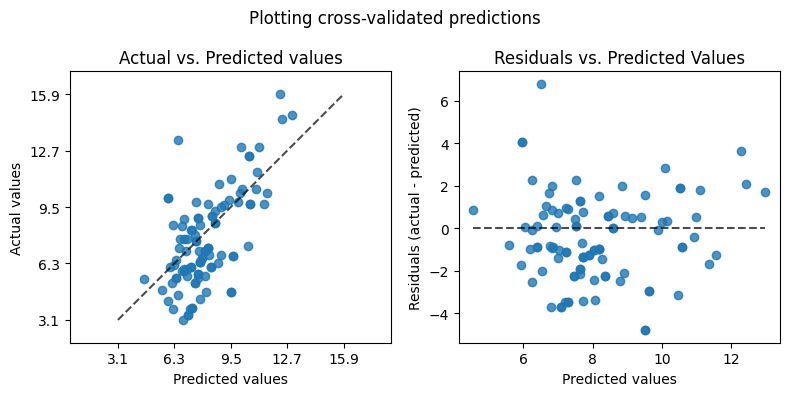

-----------XGBRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('alpha', 1.1766394658248743e-10),
             ('colsample_bytree', 0.3),
             ('gamma', 0),
             ('lambda', 2.484688746294872),
             ('learning_rate', 0.020638901341894007),
             ('max_depth', 15),
             ('min_child_weight', 4),
             ('n_estimators', 905),
             ('scale_pos_weight', 1),
             ('subsample', 1.0)])

RMSE: 0.013237666881015268


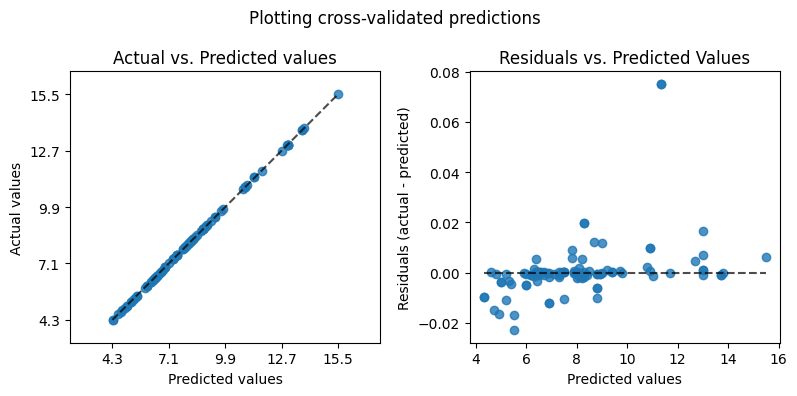

-----------HistGradientBoostingRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('early_stopping', False),
             ('l2_regularization', 0.0001549659807792507),
             ('learning_rate', 0.2),
             ('max_bins', 255),
             ('max_depth', 15),
             ('max_iter', 500),
             ('max_leaf_nodes', 31),
             ('min_samples_leaf', 50),
             ('scoring', 'neg_mean_squared_error')])

RMSE: 0.06841750776471048


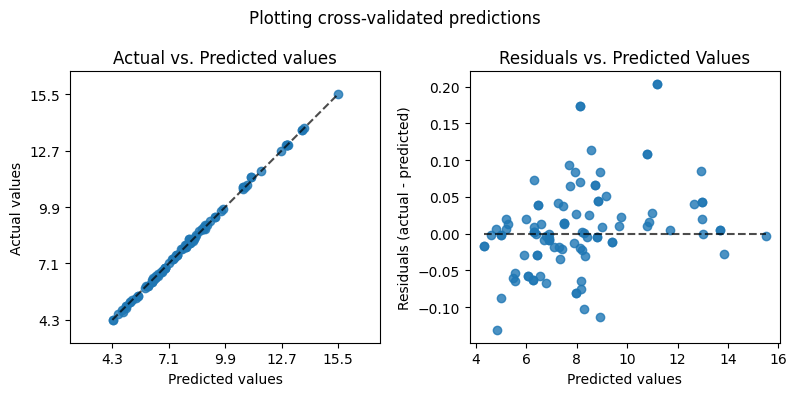

-----------LassoLarsIC-----------
Calculating best hyperparameters...


/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Best hyperparameters found.


OrderedDict([('criterion', 'aic'),
             ('eps', 0.09187306494172101),
             ('max_iter', 1419),
             ('noise_variance', 0.004333894685900382),
             ('positive', False)])

RMSE: 1.9255612485985278


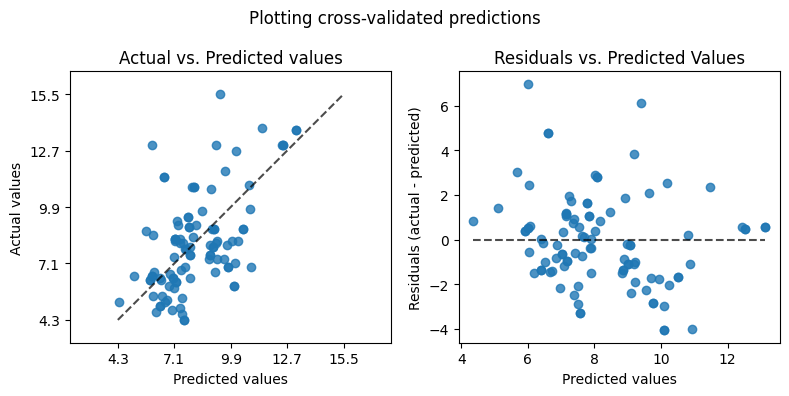

In [3]:
from pipelines import pipeline
from src.features.tuners import XGBHyperparameterTuner, HistGradientBoostingHyperparameterTuner, LassoLarsICHyperparameterTuner

for patient in unique_patients:
    patient_train_data = train_data[train_data['p_num'] == patient]
    patient_validation_data = validation_data[validation_data['p_num'] == patient]

    patient_train_data_transformed = pipeline.fit_transform(patient_train_data)
    patient_validation_data_transformed = pipeline.transform(patient_validation_data)

    X_train = patient_train_data_transformed.drop(columns=['bg+1:00'])
    y_train = patient_train_data_transformed['bg+1:00']

    X_test = patient_validation_data_transformed.drop(columns=['bg+1:00'])
    y_test = patient_validation_data_transformed['bg+1:00']

    tune(patient, XGBHyperparameterTuner(search_space='deep'), X_train, y_train, X_test, y_test)
    tune(patient, HistGradientBoostingHyperparameterTuner(), X_train, y_train, X_test, y_test)
    tune(patient, LassoLarsICHyperparameterTuner(), X_train, y_train, X_test, y_test)